In [1]:
import numpy as np

import os
#Choose GPU 0 as a default
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Model
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import sys
sys.path.append('/home/zsteineh/cnn_hilbert/cnn_hilbert_workspace')
import hilbert_DL_utils
from hilbert_DL_utils import load_data

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pretask_type = 'rel_pos'
sp = '/home/zsteineh/ez_ssl_results/'
name = pretask_type+'_acc_dict'
with open(sp+'obj/' + name + '.pkl', 'rb') as f:
        acc_dict = pickle.load(f)

In [3]:
sbj_accs = []
for sbj in acc_dict:
    for accs_set in acc_dict[sbj]:
        accs = [sbj]
        for acc in accs_set:
            accs.append(acc)
        sbj_accs.append(accs)
sbj_acc_df = pd.DataFrame.from_records(sbj_accs, columns = ['Subject', 'Train', 'Val', 'Test'])
print(sbj_acc_df)

     Subject     Train       Val      Test
0   a0f66459  0.939234  0.910053  0.854839
1   a0f66459  0.943197  0.910053  0.844086
2   a0f66459  0.945839  0.936508  0.846774
3   c95c1e82  0.813688  0.723077  0.733333
4   c95c1e82  0.863118  0.692308  0.677778
5   c95c1e82  0.889734  0.753846  0.711111
6   cb46fd46  0.966321  0.921875  0.828431
7   cb46fd46  0.994819  0.963542  0.828431
8   cb46fd46  0.967617  0.927083  0.774510
9   fcb01f7a  0.885714  0.754098  0.769565
10  fcb01f7a  0.763265  0.737705  0.669565
11  fcb01f7a  0.885714  0.754098  0.782609
12  ffb52f92  0.873950  0.689655  0.709302
13  ffb52f92  0.932773  0.931034  0.651163
14  ffb52f92  0.932773  0.793103  0.705426
15  b4ac1726  0.980961  0.938182  0.886111
16  b4ac1726  0.985494  0.945455  0.888889
17  b4ac1726  0.985494  0.938182  0.838889
18  f3b79359  0.986318  0.975000  0.971098
19  f3b79359  0.990050  0.970000  0.959538
20  f3b79359  0.997512  0.925000  0.968208
21  ec761078  0.940520  0.869403  0.837079
22  ec76107

In [4]:
sbj_acc_df = pd.DataFrame.from_records(sbj_accs, columns = ['Subject', 'Train', 'Val', 'Test'])

In [5]:
sbj_acc_df['Test'].mean()

0.8110885048074112

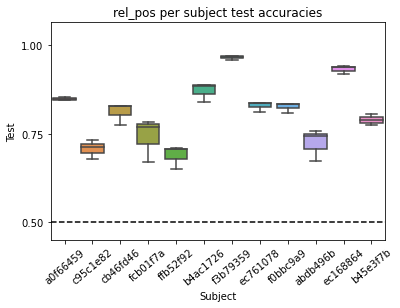

In [6]:
# plot some subject specific stuff
plt = sns.boxplot(x = 'Subject', y = 'Test', data = sbj_acc_df)
plt.set_xticklabels(plt.get_xticklabels(),rotation=40)
plt.set_title(pretask_type+' per subject test accuracies')
plt.set_ylim([(1/2)-.05,1.065])
plt.set_yticks([.5,.75,1])
plt.axhline(1/2,c='k',linestyle='--')